1) Prepare a classification model using SVM for salary data

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work
education	-- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation	 -- occupation of an individuals
relationship --
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week
native -- Native of an individual
Salary -- salary of an individual

In [ ]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
salary_test=pd.read_csv('SalaryData_Test.csv')
salary_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [ ]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
salary_test.shape

(15060, 14)

In [ ]:
salary_test.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
salary_test[salary_test.duplicated()].shape

(930, 14)

In [ ]:
salary_test[salary_test.duplicated()]

age workclass      education  educationno        maritalstatus  \
551     59   Private        HS-grad            9             Divorced   
601     32   Private        HS-grad            9   Married-civ-spouse   
681     40   Private        HS-grad            9   Married-civ-spouse   
799     24   Private      Bachelors           13        Never-married   
1044    44   Private    Prof-school           15   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
15043   51   Private        HS-grad            9   Married-civ-spouse   
15044   22   Private   Some-college           10        Never-married   
15049   32   Private        HS-grad            9   Married-civ-spouse   
15052   31   Private        HS-grad            9   Married-civ-spouse   
15053   25   Private        HS-grad            9        Never-married   

               occupation    relationship    race      sex  capitalgain  \
551         Other-service   Not-in-family   White   Female            0   
601                 Sales         Husband   White     Male            0   
681          Craft-repair         Husband   White     Male            0   
799        Prof-specialty   Not-in-family   White     Male            0   
1044       Prof-specialty         Husband   White     Male        99999   
...                   ...             ...     ...      ...          ...   
15043        Craft-repair         Husband   White     Male            0   
15044        Craft-repair       Own-child   White     Male            0   
15049   Handlers-cleaners         Husband   White     Male            0   
15052        Craft-repair         Husband   White     Male            0   
15053       Other-service       Own-child   White   Female            0   

       capitalloss  hoursperweek          native  Salary  
551              0            40   United-States   <=50K  
601              0            40   United-States   <=50K  
681              0            40   United-States   <=50K  
799              0            35   United-States   <=50K  
1044             0            60   United-States    >50K  
...            ...           ...             ...     ...  
15043            0            40   United-States   <=50K  
15044            0            40   United-States   <=50K  
15049            0            40   United-States   <=50K  
15052            0            40   United-States   <=50K  
15053            0            40   United-States   <=50K  

[930 rows x 14 columns]

In [ ]:
salary_test1=salary_test.drop_duplicates()
salary_test1.shape

(14130, 14)

In [ ]:
salary_test1.corr()

<ipython-input-9-bb96f974bded>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  salary_test1.corr()


age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.021979     0.076765     0.053172      0.088090
educationno   0.021979     1.000000     0.132346     0.085651      0.127779
capitalgain   0.076765     0.132346     1.000000    -0.033929      0.089512
capitalloss   0.053172     0.085651    -0.033929     1.000000      0.056353
hoursperweek  0.088090     0.127779     0.089512     0.056353      1.000000

In [ ]:
salary_test1['workclass']=salary_test1['workclass'].astype('category')
salary_test1['education']=salary_test1['education'].astype('category')
salary_test1['maritalstatus']=salary_test1['maritalstatus'].astype('category')
salary_test1['occupation']=salary_test1['occupation'].astype('category')
salary_test1['relationship']=salary_test1['relationship'].astype('category')
salary_test1['race']=salary_test1['race'].astype('category')
salary_test1['sex']=salary_test['sex'].astype('category')
salary_test1['native']=salary_test1['native'].astype('category')

<ipython-input-10-fba011e78d85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_test1['workclass']=salary_test1['workclass'].astype('category')
<ipython-input-10-fba011e78d85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_test1['education']=salary_test1['education'].astype('category')
<ipython-input-10-fba011e78d85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
from sklearn import preprocessing
label_encoder =preprocessing.LabelEncoder()

In [ ]:
salary_test1['Salary']=label_encoder.fit_transform(salary_test1['Salary'])
salary_test1['workclass']=label_encoder.fit_transform(salary_test1['workclass'])
salary_test1['education']=label_encoder.fit_transform(salary_test1['education'])
salary_test1['maritalstatus']=label_encoder.fit_transform(salary_test1['maritalstatus'])
salary_test1['occupation']=label_encoder.fit_transform(salary_test1['occupation'])
salary_test1['relationship']=label_encoder.fit_transform(salary_test1['relationship'])
salary_test1['race']=label_encoder.fit_transform(salary_test1['race'])
salary_test1['sex']=label_encoder.fit_transform(salary_test1['sex'])
salary_test1['native']=label_encoder.fit_transform(salary_test1['native'])

<ipython-input-12-2c18131331c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_test1['Salary']=label_encoder.fit_transform(salary_test1['Salary'])
<ipython-input-12-2c18131331c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_test1['workclass']=label_encoder.fit_transform(salary_test1['workclass'])
<ipython-input-12-2c18131331c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

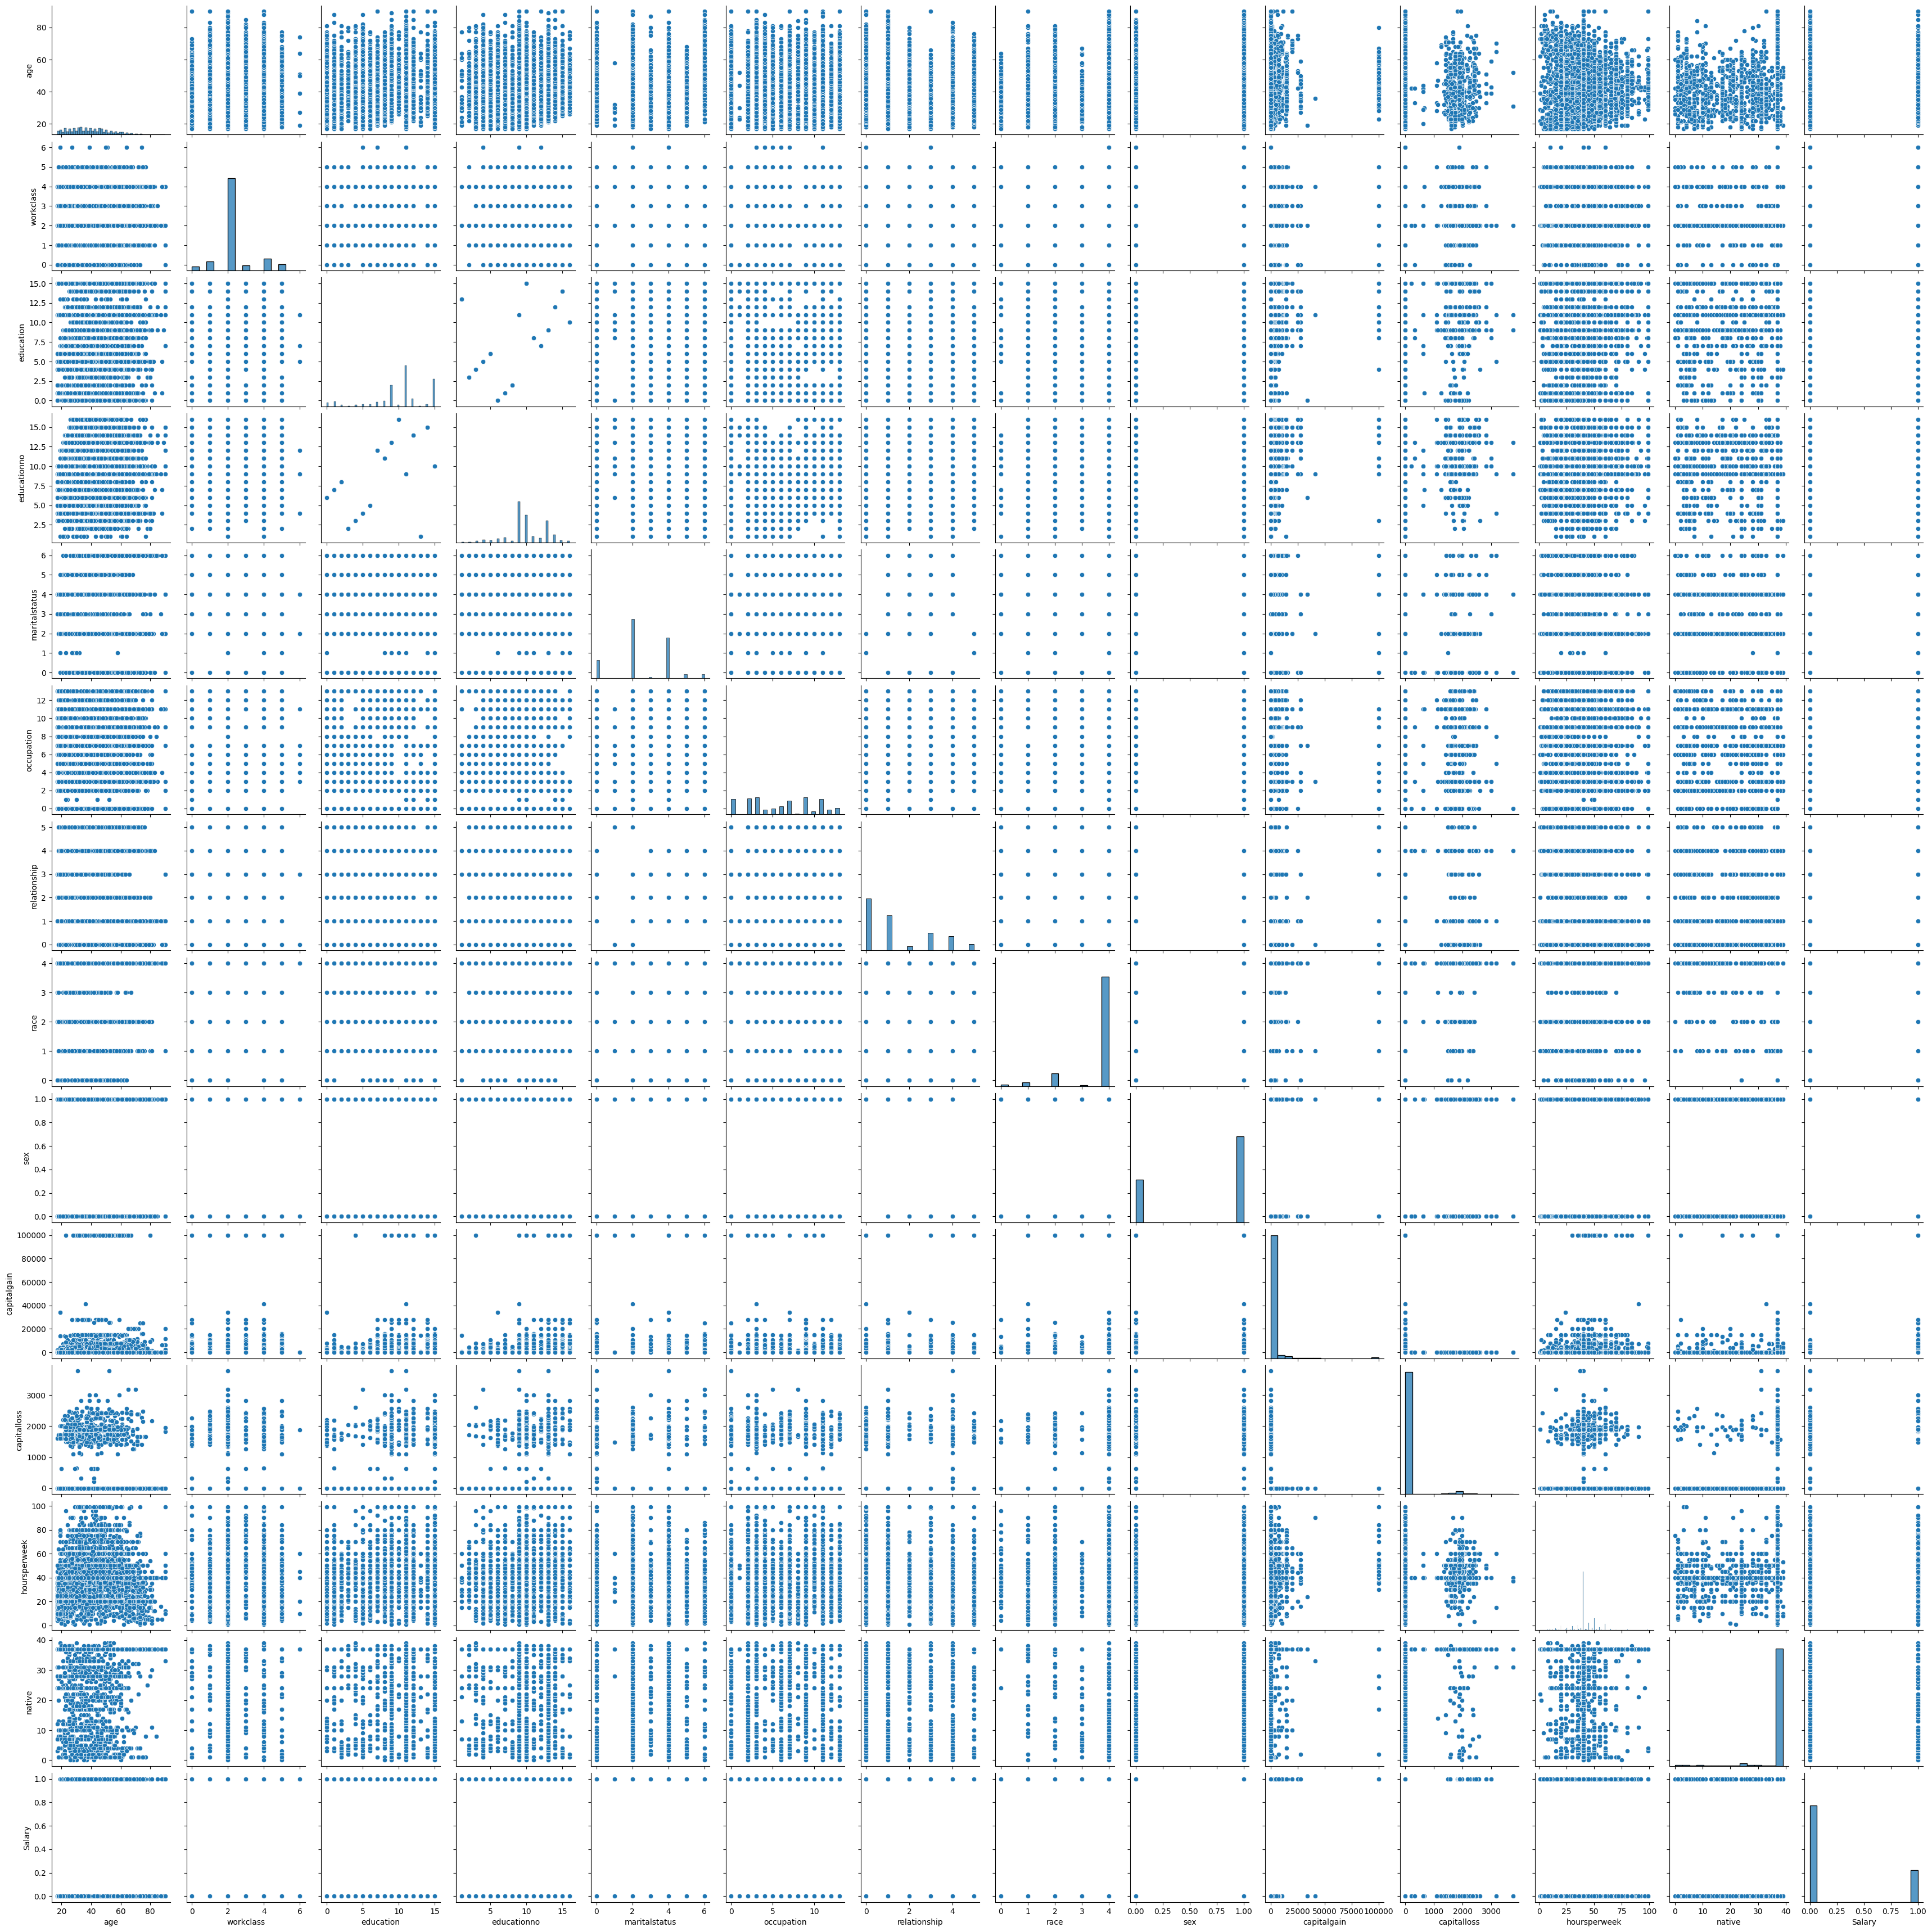

In [ ]:
import seaborn as sns
sns.pairplot(salary_test1)

<Axes: >

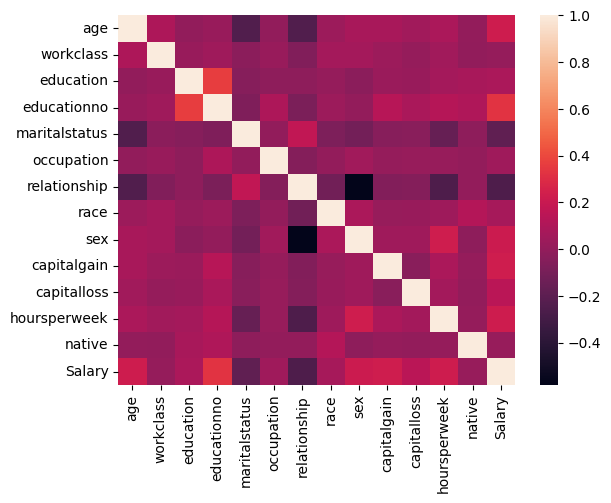

In [ ]:
sns.heatmap(salary_test1.corr())

In [ ]:
x=salary_test1.iloc[:,0:13]
y=salary_test1.iloc[:,13]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0                 3     2    1            0            0            40      37  
1                 0     4    1            0            0            50      37  
2                 0     4    1            0            0            40      37  
3                 0     2    1         7688            0            40      37  
4                 1     4    1            0            0            30      37  
...             ...   ...  ...          ...          ...           ...     ...  
15055             3     4    1            0            0            40      37  
15056             1     4    0            0            0            36      37  
15057             0     4    1            0            0            50      37  
15058             3     1    1         5455            0            40      37  
15059             0     4    1            0            0            60      37  

[14130 rows x 13 columns]

In [ ]:
y

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 14130, dtype: int64

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11304, 13), (11304,), (2826, 13), (2826,))

In [ ]:
Y_pred = clf.predict(x_test)
Y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
clf=SVC()
clf.fit(x_train , y_train)
Y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, Y_pred)

Accuracy = 79.54706298655343


array([[2044,   77],
       [ 501,  204]])

# Training dataset

In [ ]:
salary_train=pd.read_csv('SalaryData_Train.csv')
salary_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [ ]:
salary_train.shape

(30161, 14)

In [ ]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
salary_train[salary_train.duplicated()].shape

(3258, 14)

In [ ]:
salary_train1=salary_train.drop_duplicates()
salary_train1.shape

(26903, 14)

In [ ]:
salary_train1['workclass']=salary_train1['workclass'].astype('category')
salary_train1['education']=salary_train1['education'].astype('category')
salary_train1['maritalstatus']=salary_train1['maritalstatus'].astype('category')
salary_train1['occupation']=salary_train1['occupation'].astype('category')
salary_train1['relationship']=salary_train1['relationship'].astype('category')
salary_train1['race']=salary_train1['race'].astype('category')
salary_train1['sex']=salary_train['sex'].astype('category')
salary_train1['native']=salary_train1['native'].astype('category')

<ipython-input-35-72f66f96538b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_train1['workclass']=salary_train1['workclass'].astype('category')
<ipython-input-35-72f66f96538b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_train1['education']=salary_train1['education'].astype('category')
<ipython-input-35-72f66f96538b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
salary_train1['Salary']=label_encoder.fit_transform(salary_train1['Salary'])
salary_train1['workclass']=label_encoder.fit_transform(salary_train1['workclass'])
salary_train1['education']=label_encoder.fit_transform(salary_train1['education'])
salary_train1['maritalstatus']=label_encoder.fit_transform(salary_train1['maritalstatus'])
salary_train1['occupation']=label_encoder.fit_transform(salary_train1['occupation'])
salary_train1['relationship']=label_encoder.fit_transform(salary_train1['relationship'])
salary_train1['race']=label_encoder.fit_transform(salary_train1['race'])
salary_train1['sex']=label_encoder.fit_transform(salary_train1['sex'])
salary_train1['native']=label_encoder.fit_transform(salary_train1['native'])

<ipython-input-36-00b024f3ad1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_train1['Salary']=label_encoder.fit_transform(salary_train1['Salary'])
<ipython-input-36-00b024f3ad1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_train1['workclass']=label_encoder.fit_transform(salary_train1['workclass'])
<ipython-input-36-00b024f3ad1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
salary_train1.corr()

age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.075184   0.002717     0.038048      -0.245062   
workclass      0.075184   1.000000   0.021289     0.037806      -0.031961   
education      0.002717   0.021289   1.000000     0.359940      -0.040931   
educationno    0.038048   0.037806   0.359940     1.000000      -0.066536   
maritalstatus -0.245062  -0.031961  -0.040931    -0.066536       1.000000   
occupation    -0.004570   0.014047  -0.025890     0.084300       0.015094   
relationship  -0.231111  -0.070996  -0.010801    -0.092236       0.155553   
race           0.040457   0.051479   0.005572     0.035215      -0.073628   
sex            0.070434   0.079380  -0.029841     0.010941      -0.108928   
capitalgain    0.077235   0.033217   0.034550     0.126085      -0.042087   
capitalloss    0.052684   0.002739   0.020469     0.080025      -0.033890   
hoursperweek   0.072529   0.047169   0.058709     0.145491      -0.175692   
native         0.010626   0.012683   0.076605     0.096279      -0.029585   
Salary         0.223502   0.016577   0.090094     0.332178      -0.184559   

               occupation  relationship      race       sex  capitalgain  \
age             -0.004570     -0.231111  0.040457  0.070434     0.077235   
workclass        0.014047     -0.070996  0.051479  0.079380     0.033217   
education       -0.025890     -0.010801  0.005572 -0.029841     0.034550   
educationno      0.084300     -0.092236  0.035215  0.010941     0.126085   
maritalstatus    0.015094      0.155553 -0.073628 -0.108928    -0.042087   
occupation       1.000000     -0.063950  0.008183  0.066919     0.019724   
relationship    -0.063950      1.000000 -0.113708 -0.586804    -0.063322   
race             0.008183     -0.113708  1.000000  0.085786     0.020049   
sex              0.066919     -0.586804  0.085786  1.000000     0.053490   
capitalgain      0.019724     -0.063322  0.020049  0.053490     1.000000   
capitalloss      0.010873     -0.070351  0.032111  0.053084    -0.036023   
hoursperweek     0.023073     -0.248745  0.056460  0.228767     0.079403   
native           0.003024     -0.006126  0.118907 -0.004930     0.012902   
Salary           0.050711     -0.247438  0.079109  0.217360     0.228865   

               capitalloss  hoursperweek    native    Salary  
age               0.052684      0.072529  0.010626  0.223502  
workclass         0.002739      0.047169  0.012683  0.016577  
education         0.020469      0.058709  0.076605  0.090094  
educationno       0.080025      0.145491  0.096279  0.332178  
maritalstatus    -0.033890     -0.175692 -0.029585 -0.184559  
occupation        0.010873      0.023073  0.003024  0.050711  
relationship     -0.070351     -0.248745 -0.006126 -0.247438  
race              0.032111      0.056460  0.118907  0.079109  
sex               0.053084      0.228767 -0.004930  0.217360  
capitalgain      -0.036023      0.079403  0.012902  0.228865  
capitalloss       1.000000      0.049093  0.016784  0.153287  
hoursperweek      0.049093      1.000000  0.014100  0.225812  
native            0.016784      0.014100  1.000000  0.028547  
Salary            0.153287      0.225812  0.028547  1.000000

In [ ]:
salary_train1.describe()

age     workclass     education   educationno  maritalstatus  \
count  26903.000000  26903.000000  26903.000000  26903.000000   26903.000000   
mean      39.049140      2.217597     10.254135     10.144296       2.563394   
std       13.188825      0.996802      3.864670      2.620154       1.528599   
min       17.000000      0.000000      0.000000      1.000000       0.000000   
25%       29.000000      2.000000      9.000000      9.000000       2.000000   
50%       38.000000      2.000000     11.000000     10.000000       2.000000   
75%       48.000000      2.000000     12.000000     13.000000       4.000000   
max       90.000000      6.000000     15.000000     16.000000       6.000000   

         occupation  relationship          race           sex   capitalgain  \
count  26903.000000  26903.000000  26903.000000  26903.000000  26903.000000   
mean       6.053674      1.449578      3.645950      0.667621   1215.443259   
std        4.026816      1.618758      0.871165      0.471075   7805.366384   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      0.000000      4.000000      0.000000      0.000000   
50%        6.000000      1.000000      4.000000      1.000000      0.000000   
75%        9.000000      3.000000      4.000000      1.000000      0.000000   
max       13.000000      5.000000      4.000000      1.000000  99999.000000   

        capitalloss  hoursperweek        native        Salary  
count  26903.000000  26903.000000  26903.000000  26903.000000  
mean      98.427499     41.164591     35.228711      0.255734  
std      425.493211     12.347051      6.272069      0.436281  
min        0.000000      1.000000      0.000000      0.000000  
25%        0.000000     40.000000     37.000000      0.000000  
50%        0.000000     40.000000     37.000000      0.000000  
75%        0.000000     45.000000     37.000000      1.000000  
max     4356.000000     99.000000     39.000000      1.000000

<Axes: >

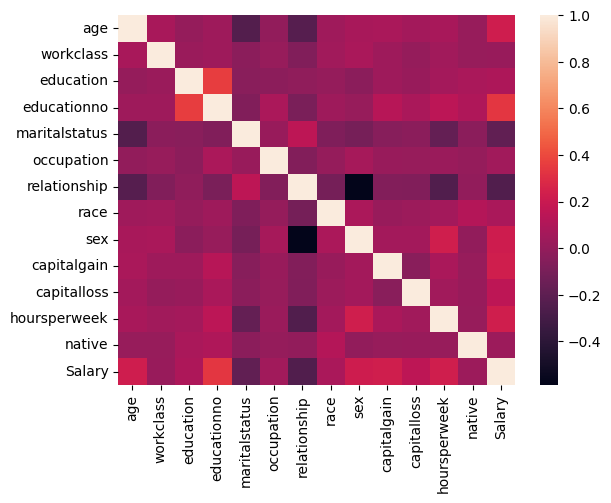

In [ ]:
sns.heatmap(salary_train1.corr())

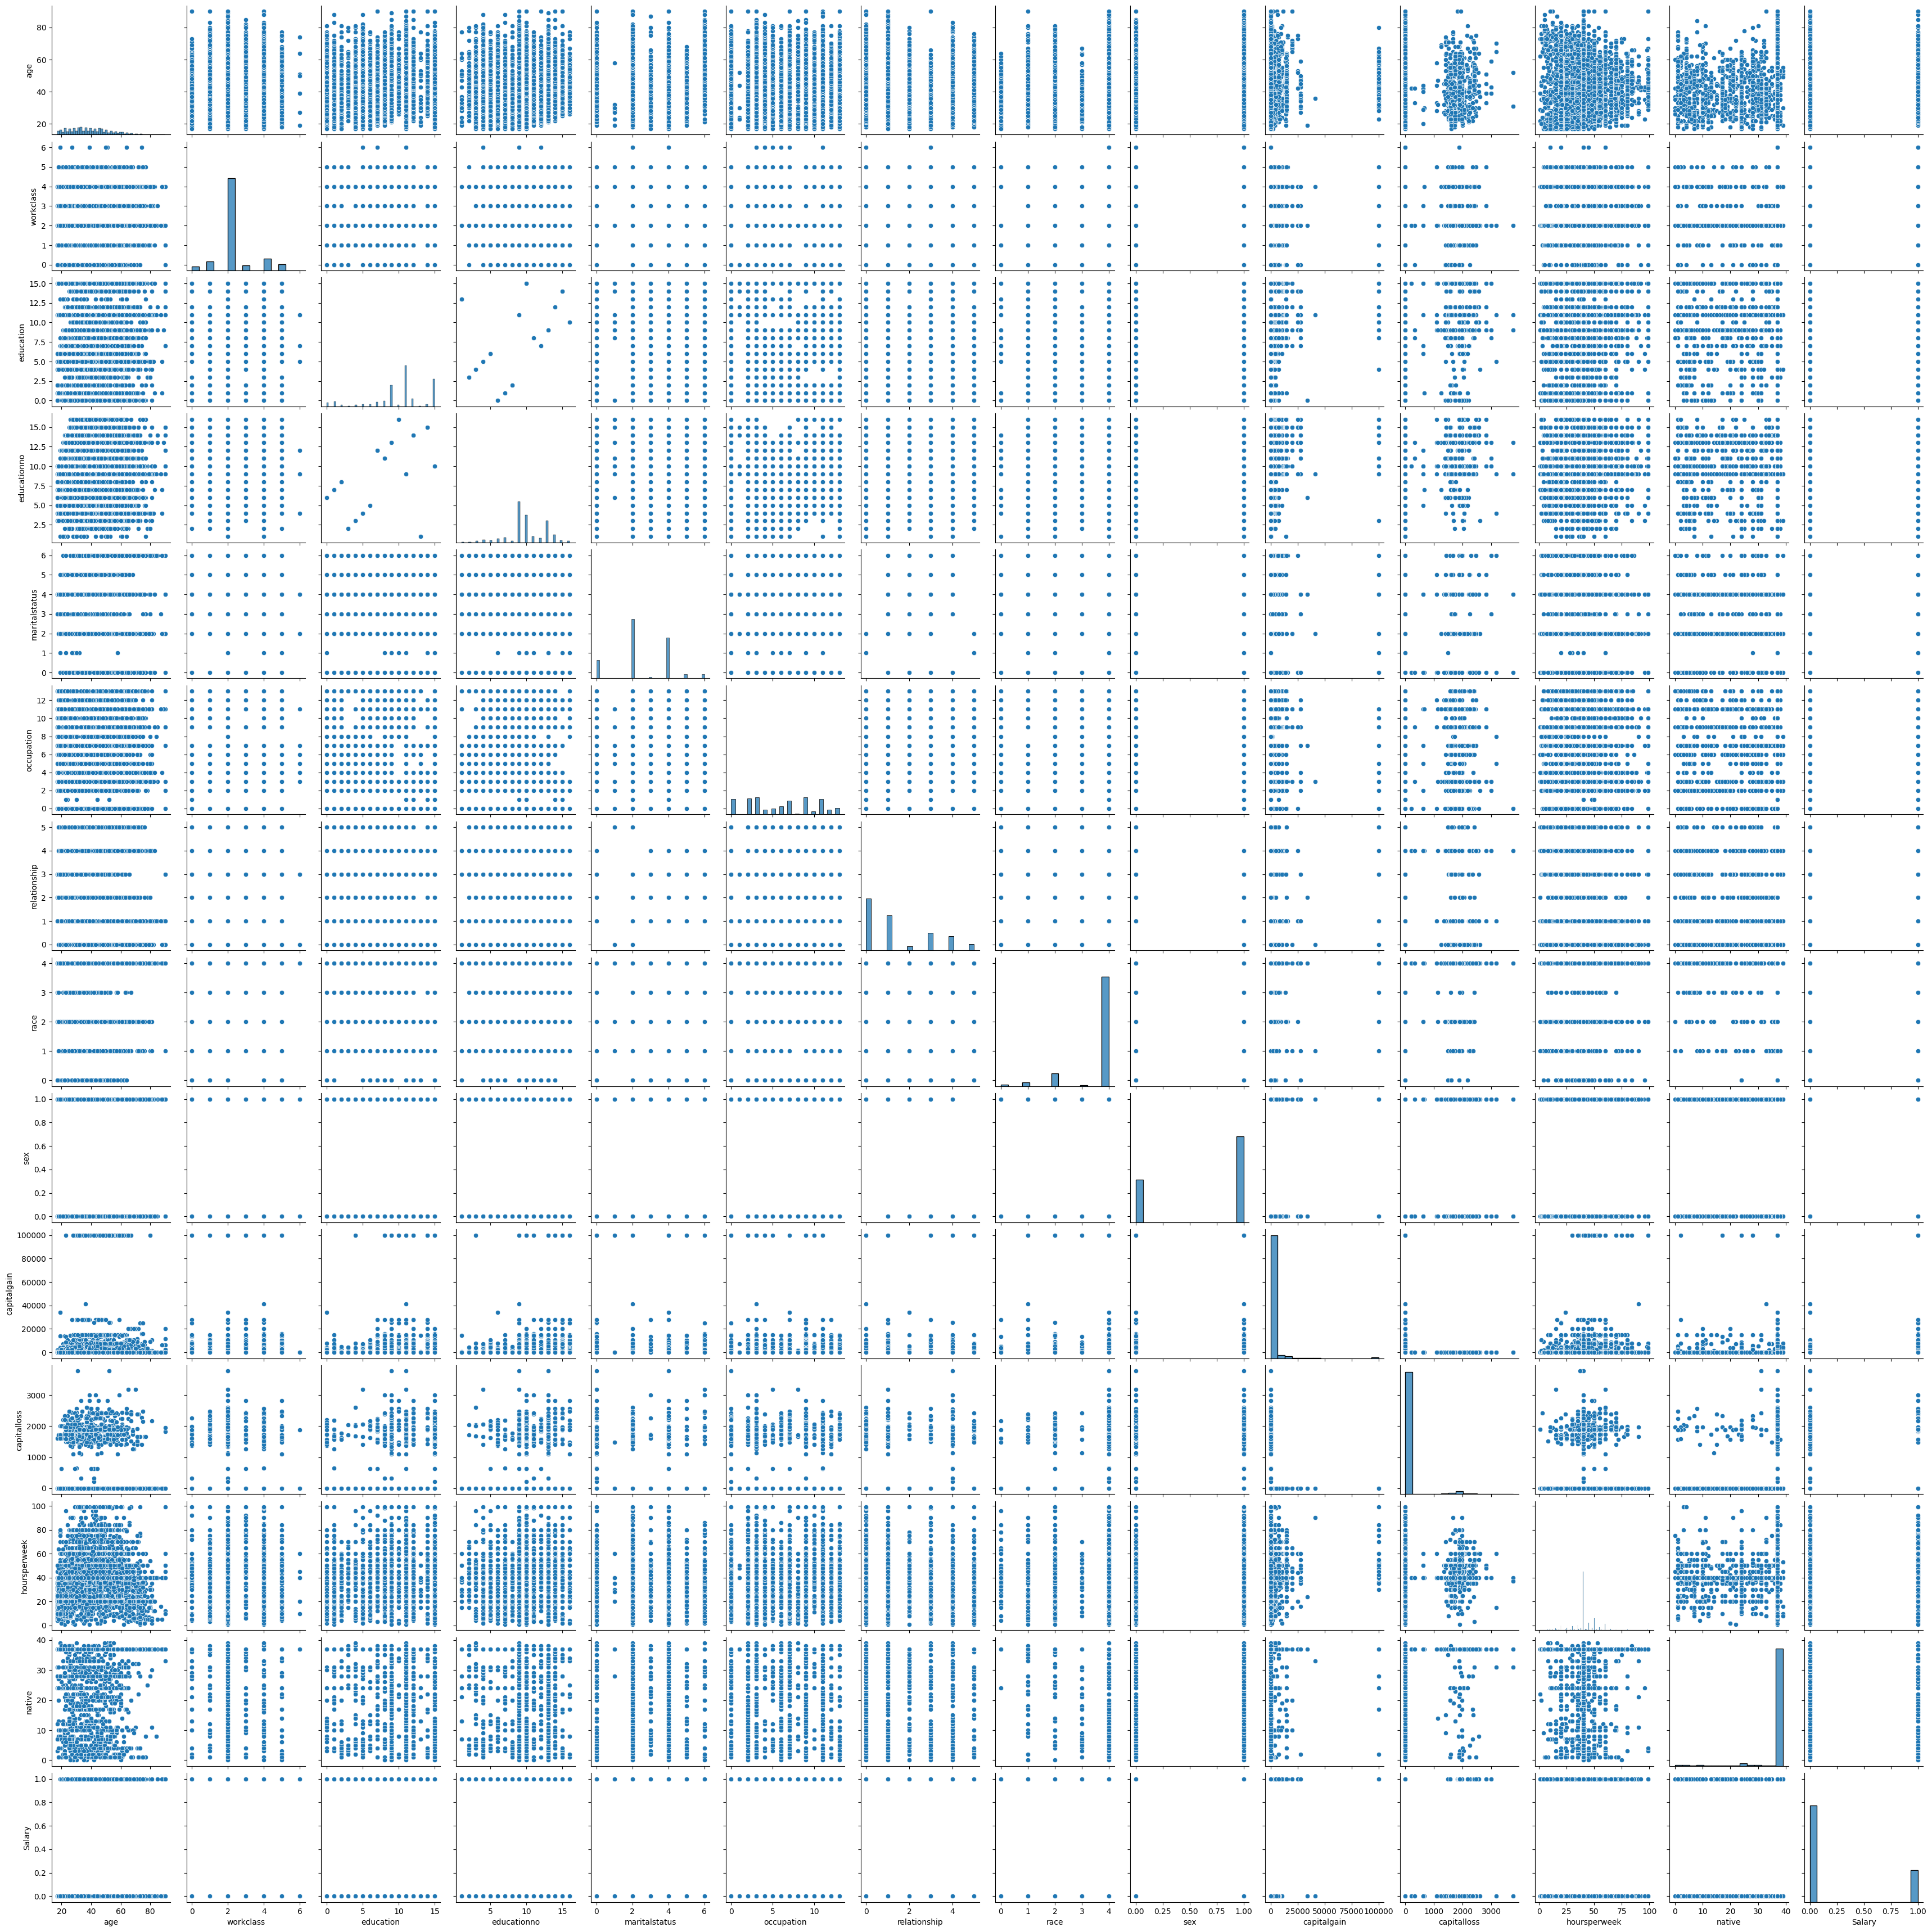

In [ ]:
sns.pairplot(salary_test1)

In [ ]:
X=salary_train1.iloc[:,0:13]
Y=salary_train1.iloc[:,13]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30154   53          2         12           14              2           3   
30155   22          2         15           10              4          10   
30156   27          2          7           12              2          12   
30158   58          2         11            9              6           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0                 1     4    1         2174            0            40      37  
1                 0     4    1            0            0            13      37  
2                 1     4    1            0            0            40      37  
3                 0     2    1            0            0            40      37  
4                 5     2    0            0            0            40       4  
...             ...   ...  ...          ...          ...           ...     ...  
30154             0     4    1            0            0            40      37  
30155             1     4    1            0            0            40      37  
30156             5     4    0            0            0            38      37  
30158             4     4    0            0            0            40      37  
30160             5     4    0        15024            0            40      37  

[26903 rows x 13 columns]

In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30154    1
30155    0
30156    0
30158    0
30160    1
Name: Salary, Length: 26903, dtype: int64

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
clf=SVC()
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 79.76212599888497


array([[3887,  145],
       [ 944,  405]])